# MadMiner particle physics tutorial

# Part 2b: Analyzing events at Delphes level

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

In this second part of the tutorial, we'll generate events and extract the observables and weights from them. You have two options: In this notebook we'll do this with Delphes, in the alternative part 2a we stick to parton level.

## 0. Preparations

Before you execute this notebook, make sure you have working installations of MadGraph, Pythia, and Delphes.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.core import MadMiner
from madminer.delphes import DelphesReader
from madminer.sampling import combine_and_shuffle
from madminer.plotting import plot_distributions


In [2]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.DEBUG
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

Please enter here the path to your MG5 root directory. This notebook assumes that you installed Delphes and Pythia through MG5.

## 5. Plot distributions

Let's see what our MC run produced:

14:13 madminer.analysis    INFO    Loading data from data/delphes_data_shuffled.h5
14:13 madminer.analysis    INFO    Found 1 parameters
14:13 madminer.analysis    DEBUG      kapz (LHA: NEWCOUP 1, maximal power in squared ME: (2,), range: (0.0, 5.0))
14:13 madminer.analysis    INFO    Did not find nuisance parameters
14:13 madminer.analysis    INFO    Found 3 benchmarks, of which 3 physical
14:13 madminer.analysis    DEBUG      no-higgs: kapz = 0.00e+00
14:13 madminer.analysis    DEBUG      sm: kapz = 1.00
14:13 madminer.analysis    DEBUG      5sq-higgs: kapz = 5.00
14:13 madminer.analysis    INFO    Found 5 observables
14:13 madminer.analysis    DEBUG      0 pt_j1
14:13 madminer.analysis    DEBUG      1 delta_phi_jj
14:13 madminer.analysis    DEBUG      2 met
14:13 madminer.analysis    DEBUG      3 m4l
14:13 madminer.analysis    DEBUG      4 delta_eta_jj
14:13 madminer.analysis    INFO    Found 1661817 events
14:13 madminer.analysis    INFO      567199 signal events sampled from bench

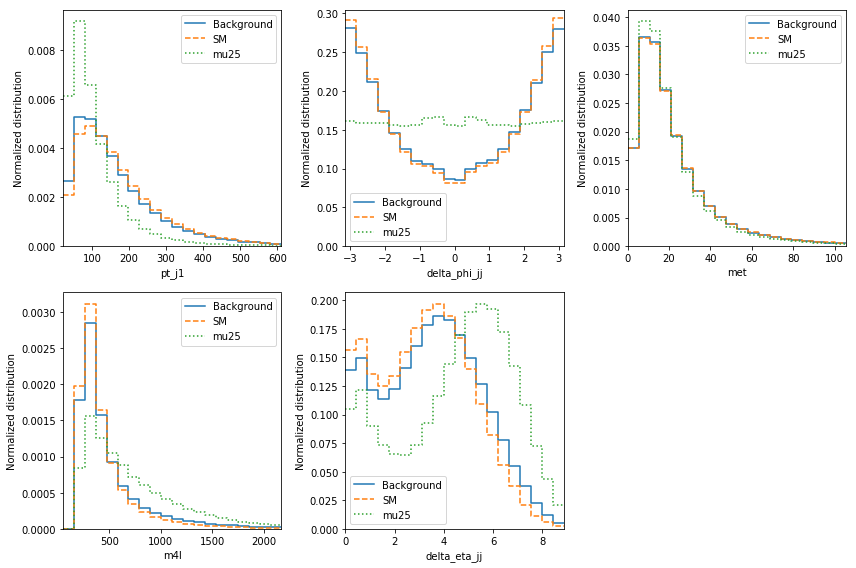

In [3]:
_ = plot_distributions(
    filename='data/delphes_data_shuffled.h5',
    parameter_points=['no-higgs', 'sm', '5sq-higgs'],
    line_labels=['Background', 'SM', 'mu25'],
    uncertainties='none',
    n_bins=20,
    n_cols=3,
    normalize=True,
)